<a href="https://colab.research.google.com/github/bangse94/StudyDL/blob/main/MLP_fulladder.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

epoch : 0 acc : 0
epoch : 100 acc : 0
epoch : 200 acc : 0.2924107648659414
epoch : 300 acc : 0.7990562687264267
epoch : 400 acc : 0.9429042584836757
epoch : 500 acc : 0.9837720420007904
epoch : 600 acc : 0.9953868614807082
epoch : 700 acc : 0.9986884990823669
epoch : 800 acc : 0.9996271260711196
epoch : 900 acc : 0.9998939850993
epoch : 1000 acc : 0.999969857589037
epoch : 1100 acc : 0.9999914297711611
epoch : 1200 acc : 0.9999975632627763
epoch : 1300 acc : 0.9999993071710609
epoch : 1400 acc : 0.9999998030100985
epoch : 1500 acc : 0.9999999439904178
epoch : 1600 acc : 0.9999999840749414
epoch : 1700 acc : 0.9999999954720673
epoch : 1800 acc : 0.999999998712583
epoch : 1900 acc : 0.9999999996339518
epoch : 2000 acc : 0.9999999998959229
epoch : 2100 acc : 0.9999999999704081
epoch : 2200 acc : 0.9999999999915854
epoch : 2300 acc : 0.9999999999976067
epoch : 2400 acc : 0.9999999999993172
epoch : 2500 acc : 0.9999999999998017
epoch : 2600 acc : 0.9999999999999338
epoch : 2700 acc : 0.9999

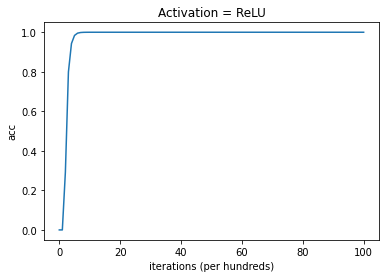

In [3]:
import numpy as np
import matplotlib.pyplot as plt

class MLP(object):
    def __init__(self, **kwargs):
        self.layers = kwargs['layers']
        self.in_dim = self.layers[0]
        self.L1dim = self.layers[1]
        self.out_dim = self.layers[2]

    def init_params(self):
        self.W1 = np.random.randn(self.in_dim, self.L1dim)
        self.b1 = np.random.randn(self.L1dim, 8)
        self.W2 = np.random.randn(self.L1dim, self.out_dim)
        self.b2 = np.random.randn(self.out_dim, 8)
        return self.W1, self.b1, self.W2, self.b2

    def relu(self, x):
        out = x
        out[x<0] = 0
        return out

    def inv_relu(self, x):
        x[x<0] = 0
        dx = x
        return dx


    def forward(self, W, X, b):
        return np.dot(W.T, X) + b

    def accuracy(self, Y, Y_hat):
        acc = np.abs(Y - Y_hat)
        acc_ = 0
        for i in range(len(acc)):
            for j in range(len(acc[0])):
                acc_ += acc[i, j]

        acc = 1 - acc_
        if acc < 0:
            acc = 0
        return acc

    def get_loss(self, _params):
        W1, b1, W2, b2 = _params

        #forward input layer
        U1 = self.forward(W1, X, b1)
        Z1 = self.relu(U1)

        #forward hidden layer
        U2 = self.forward(W2, Z1, b2)
        Y_hat = self.relu(U2)

        loss = (Y-Y_hat)**2/2

        return U1, Z1, U2, Y_hat, loss

    def get_grad(self, _params):
        W1, b1, W2, b2 = _params
        U1, Z1, U2, Y_hat, loss = self.get_loss([W1, b1, W2, b2])

        #backprop hidden layer
        dW2 = np.dot(Z1, (Y-Y_hat).T)
        dB2 = 1./8.*(Y_hat-Y)
        dZ1 = np.dot(W2, Y_hat - Y)

        #backprop input layer
        dU1 = dZ1 * self.inv_relu(Z1)
        dW1 = np.dot(X, dU1.T)
        dB1 = 1./8.*dU1

        return [dW1, dB1, dW2, dB2], loss, Y_hat

    def optimizer(self, _params, lr=0.1, n_iter=1000):
        params = np.copy(_params)
        acc_trace = []
        for epoch in range(n_iter):
            dparams, loss, Y_hat = self.get_grad(params)
            acc = self.accuracy(Y, Y_hat)
            for i in range(len(params)):
                params[i] -= lr*dparams[i]

            if epoch % 100 == 0:
                acc_trace.append(acc)
                print('epoch :', epoch, 'acc :', acc)

        _, _, _, Y_hat_predict, _ = self.get_loss(params)
        acc = self.accuracy(Y, Y_hat_predict)

        return Y_hat_predict, acc_trace, acc


model = MLP(layers=[3,4,2])

X = np.array([0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1]).reshape(3, 8)
Y = np.array([0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1]).reshape(2, 8)

params = MLP.init_params(model)
Y_hat_predict, acc_trace, acc = MLP.optimizer(model, params, 0.1, 10001)
print('Y_hat: ',Y_hat_predict)
print(round(acc,4))

plt.plot(acc_trace)
plt.title('Activation = ReLU')
plt.ylabel('acc')
plt.xlabel('iterations (per hundreds)')
plt.show()